In [1]:
import json
from pathlib import Path

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import hashlib
import re
def remove_whitespaces(s: str):
    return re.sub(r'\s+', '', s)

sns.set_context("paper", font_scale=3)
# color: black, grey, white
DATE='0916'
cp = sns.dark_palette('#fff', n_colors=4, reverse=True)
sns.set_palette(cp)
cp

[(1.0, 1.0, 1.0),
 (0.7159045491976732, 0.7159066761604727, 0.7158983000184118),
 (0.4318090983953464, 0.4318133523209452, 0.4317966000368235),
 (0.1477136475930195, 0.14772002848141771, 0.1476949000552352)]

# Preprocessing

In [3]:
# df_frame = pd.read_pickle('imr/0501-df_frame-raf.pkl.zst', compression='zstd')
# df_context = pd.read_pickle('imr/0501-df_context.pkl.zst', compression='zstd')
df_context_noraf = pd.read_pickle(f'imr/{DATE}-df_context-noraf.pkl.zst', compression='zstd')
df_context_noraf = df_context_noraf[df_context_noraf['label_ERROR'].isna() | (df_context_noraf['label_ERROR'] == 0)]
# df_shader = pd.read_pickle('imr/0501-df_shader-noraf.pkl.zst', compression='zstd')

In [4]:
df_context_noraf.columns.to_list()

['idx-frame',
 'idx',
 'category',
 'label_ERROR',
 'label_usecase',
 'label_interactions',
 'label_comments',
 'url',
 'date',
 'netIdleTimeout',
 'manual_interaction',
 'manual_interaction_failed',
 'raf_path',
 'url_essential',
 'frame.url',
 'frame.title',
 'frame.date',
 'frame.when',
 'frame.counter.frames',
 'frame.counter.contextsNum',
 'frame.counter.usedWebGL',
 'frame.counter.usedOffScreenCanvas',
 'frame.context.canvasSize',
 'frame.context.canvasHidden',
 'frame.context.canvasContained',
 'frame.context.maghsk.exception',
 'frame.context.maghsk.createTime',
 'frame.context.maghsk.createArguments.0',
 'frame.context.maghsk.createArguments.1.alpha',
 'frame.context.maghsk.createArguments.1.depth',
 'frame.context.maghsk.createArguments.1.stencil',
 'frame.context.maghsk.createArguments.1.antialias',
 'frame.context.maghsk.createArguments.1.premultipliedAlpha',
 'frame.context.maghsk.createArguments.1.preserveDrawingBuffer',
 'frame.context.maghsk.createArguments.1.powerPrefe

In [5]:
df_context_noraf['frame.counter.usedWebGL'].isna().sum()

0

In [6]:
df_context_noraf['url'].nunique()

15525

In [7]:
df_context_noraf.shape

(34615, 374)

In [8]:
# print("Frame shape:", df_frame.shape)
print("Context shape:", df_context_noraf.shape)

Context shape: (34615, 374)


In [9]:
def url_essential(x):
    if x.startswith('http://'):
        x = x[7:]
    if x.startswith('https://'):
        x = x[8:]
    return x.strip('/')

In [10]:
func_count_list = [x for x in df_context_noraf.columns.to_list() if x.startswith('frame.context.maghsk.counter.funcCount.')]
draw_commands = [x for x in func_count_list if x.lower().find('draw') != -1]
draw_commands.append('frame.context.maghsk.counter.funcCount.readPixels')
draw_commands

['frame.context.maghsk.counter.funcCount.drawArrays',
 'frame.context.maghsk.counter.funcCount.drawElements',
 'frame.context.maghsk.counter.funcCount.drawBuffers',
 'frame.context.maghsk.counter.funcCount.drawElementsInstanced',
 'frame.context.maghsk.counter.funcCount.drawArraysInstanced',
 'frame.context.maghsk.counter.funcCount.readPixels']

In [11]:
df_context_noraf

,idx-frame,idx,category,label_ERROR,label_usecase,label_interactions,label_comments,url,date,netIdleTimeout,...,frame.context.maghsk.counter.funcCount.clearBufferfi,frame.context.maghsk.counter.textureTypes.DataView,frame.context.maghsk.counter.textureTypes.Vector2,frame.context.maghsk.createArguments.1.referrer,frame.context.maghsk.createArguments.1.useWebgl2,frame.context.maghsk.createArguments.1.dpi,frame.context.maghsk.createArguments.1.clearColor,frame.context.maghsk.counter.funcCount.getAttachedShaders,frame.context.maghsk.createArguments.1.adaptToDeviceRatio,frame.context.maghsk.createArguments.1.dnt
0,0,0,[bq],0,1,0,,http://0ldsk00l.ca/,1.686218e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,[bq],0,3,0,,http://1000000-lives.com/,1.686218e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,[bq],0,3,0,,http://1000000-lives.com/,1.686218e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,2,[bq],0,3,0,,http://1000000-lives.com/,1.686218e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,2,[bq],0,3,0,,http://1000000-lives.com/,1.686218e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35478,116544,29224,[bq],0,1,0,,https://zurstrass.com/,1.686386e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35479,116544,29224,[bq],0,1,0,,https://zurstrass.com/,1.686386e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35480,116571,29230,[bq],0,1,0,,https://zycieczestochowy.pl/wydanie-9-05-2022/,1.686337e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35481,116571,29230,[bq],0,1,0,,https://zycieczestochowy.pl/wydanie-9-05-2022/,1.686337e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_context_noraf.duplicated(subset='idx', keep='first')

0        False
1        False
2         True
3         True
4         True
         ...  
35478    False
35479     True
35480    False
35481     True
35482    False
Length: 34615, dtype: bool

In [13]:
# # tmp = df_context_noraf
# tmp = df_context_noraf.duplicated(subset='idx', keep='first')
# tmp = tmp[tmp['frame.url'].map(lambda x: url_essential(x.strip())) != tmp['url'].map(lambda x: url_essential(x.strip()))]
# tmp[tmp[func_count_list].sum(axis=1) > 100][['url', 'frame.url']]

In [14]:
df_context_noraf = df_context_noraf[df_context_noraf[func_count_list].sum(axis=1) > 0]
print("U_w =", df_context_noraf.idx.nunique())
print("F_w =", df_context_noraf['idx-frame'].nunique())
print("C_w =", len(df_context_noraf))
df_context_noraf

U_w = 11994
F_w = 14549
C_w = 27293


,idx-frame,idx,category,label_ERROR,label_usecase,label_interactions,label_comments,url,date,netIdleTimeout,...,frame.context.maghsk.counter.funcCount.clearBufferfi,frame.context.maghsk.counter.textureTypes.DataView,frame.context.maghsk.counter.textureTypes.Vector2,frame.context.maghsk.createArguments.1.referrer,frame.context.maghsk.createArguments.1.useWebgl2,frame.context.maghsk.createArguments.1.dpi,frame.context.maghsk.createArguments.1.clearColor,frame.context.maghsk.counter.funcCount.getAttachedShaders,frame.context.maghsk.createArguments.1.adaptToDeviceRatio,frame.context.maghsk.createArguments.1.dnt
0,0,0,[bq],0,1,0,,http://0ldsk00l.ca/,1.686218e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,[bq],0,3,0,,http://1000000-lives.com/,1.686218e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,[bq],0,3,0,,http://1000000-lives.com/,1.686218e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,2,[bq],0,3,0,,http://1000000-lives.com/,1.686218e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,2,[bq],0,3,0,,http://1000000-lives.com/,1.686218e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35478,116544,29224,[bq],0,1,0,,https://zurstrass.com/,1.686386e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35479,116544,29224,[bq],0,1,0,,https://zurstrass.com/,1.686386e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35480,116571,29230,[bq],0,1,0,,https://zycieczestochowy.pl/wydanie-9-05-2022/,1.686337e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35481,116571,29230,[bq],0,1,0,,https://zycieczestochowy.pl/wydanie-9-05-2022/,1.686337e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## exclude draw=0

In [15]:
# draw_commands=[
#     'frame.context.maghsk.counter.funcCount.drawArrays',
#     'frame.context.maghsk.counter.funcCount.drawElements',
#     'frame.context.maghsk.counter.funcCount.drawBuffers',
#     'frame.context.maghsk.counter.funcCount.drawElementsInstanced',
#     'frame.context.maghsk.counter.funcCount.drawArraysInstanced',
#     # 'frame.context.maghsk.counter.funcCount.drawRangeElements',
#     'frame.context.maghsk.counter.funcCount.readPixels',
# ]
# df_context_noraf = df_context_noraf[df_context_noraf[func_count_list].sum(axis=1) > 0]

In [16]:
set(df_context_noraf[df_context_noraf[func_count_list].sum(axis=1) > 0].url.tolist()) - set(df_context_noraf[df_context_noraf[draw_commands].sum(axis=1) > 0].url.tolist())

{'https://www.boston.gov/departments/public-health-commission/covid-19-vaccine-boston',
 'https://www.suntory.co.jp/factory/beer/beeriland/',
 'https://www.ao-ex.com/',
 'http://nmedicine.net',
 'https://www.sonnalp-achensee.at/',
 'https://endeavour.gaadi.com/templates/endeavour/popup_frame.tpl.php?make=Ford&model=Endeavour&open_page=videos&open_page_again=0',
 'https://www.championat.com/other/news-4990449-emmanyuel-makron-reshenie-o-dopuske-rossijskih-sportsmenov-na-oi-ozhidaetsya-letom.html',
 'https://hbcable.en.taiwantrade.com/',
 'https://d-wackys.hatenablog.com/',
 'https://www.gotprint.com/company/stock/papers/premium-smooth-white.html',
 'https://dentalbright.en.alibaba.com/',
 'https://www.stellarinfo.co.in/request-free-quote.php?utm_source=Request-for-Call&utm_medium=Request-for-Call-Banner',
 'https://howdy.gr/',
 'http://sunnyanneholliday.com/videos/',
 'http://www.imosa.asia/',
 'http://www.coimbraimobiliaria.com.br/i/comercial/aldeia/316389',
 'https://www.roxelgroup.co

In [17]:
url_num = df_context_noraf.idx.nunique()
draw_url_num = df_context_noraf[df_context_noraf[draw_commands].sum(axis=1) > 0].idx.nunique()

In [18]:
print("url_num =", url_num)
print("draw_url_num =", draw_url_num)

url_num = 11994
draw_url_num = 9186


In [19]:
set(df_context_noraf[df_context_noraf[draw_commands].sum(axis=1) > 0].url.to_list())

{'https://mppgcollege.org/',
 'http://iu7.bmstu.ru/',
 'https://www.arrizza.it/',
 'https://www.starwarsgamesonline.com/game/yoda-s-jedi-training',
 'http://mauricioveiculos.com.br/',
 'https://chaosgone.global/',
 'https://dpstudio.jp/',
 'https://www.research.uky.edu/',
 'https://aqrisk.com',
 'https://aksaj.superjob.ru/',
 'https://luftking.en.taiwantrade.com/',
 'https://panorama.akcaabat.bel.tr/',
 'https://asap.digital/',
 'http://threegraphs.com/charts/new/world/',
 'https://conf2022.pwanight.jp/',
 'https://www.renishaw.com.tr/tr/renishaw-virtual-expo--45465',
 'https://www.seepark-oggau.at/',
 'https://www.mcube.fr',
 'https://www.yom.jp/sdgs/#top',
 'https://www.raicho-nagano.jp/',
 'https://summonersarena.io/',
 'https://momonohana.eey.jp/staff.html',
 'https://aphrodite.io/',
 'https://samaria.co.jp/',
 'https://extranet.prb.com.mx/Prb1.2/index.jsp#!',
 'https://leninogorsk.superjob.ru/',
 'https://awards.inggoodfinds.market/',
 'https://ftechno.fr/',
 'https://www.villeded

In [20]:
# IMPORTANT TODO: check if this is correct
df_context_noraf = df_context_noraf[df_context_noraf[draw_commands].sum(axis=1) > 0]

In [21]:
df_context_noraf[df_context_noraf['url'] == 'https://www.henzensport.ch/'].to_csv('tmp.csv')

In [22]:
# df_context_noraf = df_context_noraf[df_context_noraf[draw_commands].sum(axis=1) > 0]

In [23]:
df_context_noraf.to_pickle(f'imr/{DATE}-draw_df_context_noraf.pkl.zst', compression='zstd')

In [24]:
df_context_noraf['label_usecase'].value_counts()

label_usecase
1    10495
3     1209
4      102
2       50
Name: count, dtype: Int64

In [25]:
tmp = df_context_noraf.drop_duplicates(subset=['idx'])[['label_ERROR', 'label_usecase', 'label_interactions', 'label_comments']]
for col in tmp.columns:
    # print(col)
    print(tmp[col].value_counts())
    print()

label_ERROR
0    9045
Name: count, dtype: Int64

label_usecase
1    7988
3     945
4      76
2      38
Name: count, dtype: Int64

label_interactions
0    7864
1    1183
Name: count, dtype: Int64

label_comments
                  7992
File not found     415
scroll             405
TODO               210
waiting            143
Name: count, dtype: Int64



In [26]:
translate = {
    'bq': 'HTTP Archive',
    'awwwards': 'Crawling/Galleries',
    'tranco': 'Crawling/Top list',
    'cssdesign': 'Crawling/Galleries',
    'threejs': 'Crawling/Galleries',
    'tfjs_gallery': 'Crawling/Galleries',
    'googleart': 'Crawling/Galleries',
    'custom': 'Crawling/Galleries',
    'david': 'Crawling/Galleries',
}
df_context_noraf['data source'] = df_context_noraf['category'].map(lambda x: [translate[y] for y in x])

/tmp/ipykernel_3819307/3740266323.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_context_noraf['data source'] = df_context_noraf['category'].map(lambda x: [translate[y] for y in x])


In [27]:
# HTTP Archive          20906
# Crawling/Galleries     4786
# Crawling/Top list      3489

In [28]:
data_sources = ['HTTP Archive','Crawling/Galleries','Crawling/Top list']
for data_source in data_sources:
    tmp = df_context_noraf[df_context_noraf['data source'].map(lambda x: data_source in x)]
    print(data_source, tmp['idx'].nunique(), tmp['idx-frame'].nunique(), tmp.shape[0])

HTTP Archive 7089 7688 9279
Crawling/Galleries 1986 1997 2615
Crawling/Top list 204 206 264


In [29]:
df_context_noraf['idx-frame'].value_counts().describe(percentiles=[0.5, 0.75, 0.9, 0.95, 0.99])

count    9797.000000
mean        1.227927
std         0.904598
min         1.000000
50%         1.000000
75%         1.000000
90%         2.000000
95%         2.000000
99%         6.000000
max        26.000000
Name: count, dtype: float64

In [30]:
df_context_noraf['idx-frame'].value_counts()

idx-frame
76661     26
6566      16
27712     15
70572     15
78392     15
          ..
37029      1
37009      1
36981      1
36961      1
116579     1
Name: count, Length: 9797, dtype: int64

In [31]:
df_context_noraf[df_context_noraf['idx-frame']==6757].to_excel('tmp.xlsx')

# RQ1: extensions

In [32]:
print("Canvas count:", df_context_noraf.dropna(subset=['frame.context.maghsk.createArguments.0']).shape[0])

Canvas count: 12030


In [33]:
from collections import defaultdict

In [34]:
with open('input/webgl-extension-categories.json', 'r') as fp:
    category_to_extension = json.load(fp)

extension_to_category = defaultdict(lambda: 'unknown')
for category, extensions in category_to_extension.items():
    for extension in extensions:
        extension_to_category[extension] = category

In [35]:
tmp = df_context_noraf[['frame.context.maghsk.createArguments.0', 'frame.context.maghsk.extensions']].dropna()
tmp['frame.context.maghsk.extensions'] = tmp['frame.context.maghsk.extensions'].apply(lambda x: len(set(x)))
tmp.rename(columns={'frame.context.maghsk.createArguments.0': 'type', 'frame.context.maghsk.extensions': 'extension_count'}, inplace=True)
tmp['type'].replace({'experimental-webgl': 'webgl'}, inplace=True)

In [36]:
tmp['extension_count'].value_counts()

extension_count
9     2426
0     1573
4     1464
5      801
1      770
2      678
3      670
8      640
6      604
7      382
11     332
10     276
13     257
14     244
12     200
25     162
20     111
15     107
23      64
19      59
18      59
17      46
22      46
21      24
16      17
29       8
31       4
28       2
33       1
27       1
24       1
26       1
Name: count, dtype: int64

In [37]:
# count zero of extension_count
1 - (tmp['extension_count'].value_counts() / len(tmp))

extension_count
9     0.798337
0     0.869244
4     0.878304
5     0.933416
1     0.935993
2     0.943641
3     0.944306
8     0.946800
6     0.949792
7     0.968246
11    0.972402
10    0.977057
13    0.978637
14    0.979717
12    0.983375
25    0.986534
20    0.990773
15    0.991106
23    0.994680
19    0.995096
18    0.995096
17    0.996176
22    0.996176
21    0.998005
16    0.998587
29    0.999335
31    0.999667
28    0.999834
33    0.999917
27    0.999917
24    0.999917
26    0.999917
Name: count, dtype: float64

(0.0, 40.0)

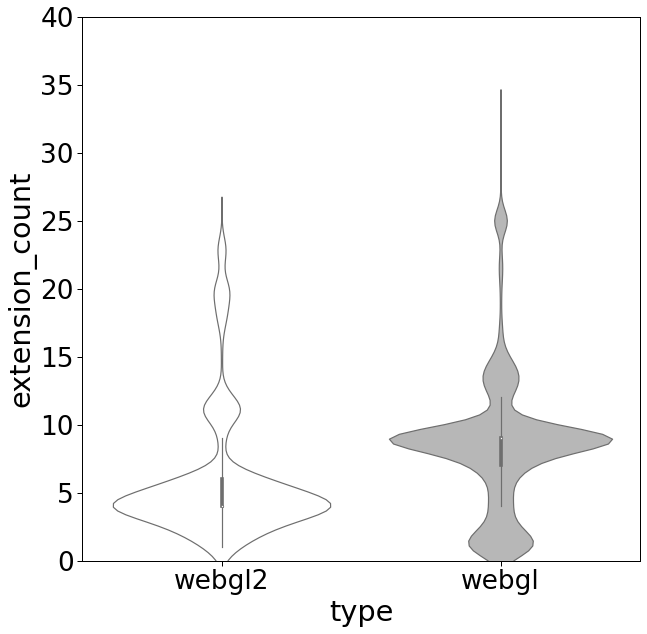

In [38]:
# show the distribution of extension_count of each context TYPE
plt.figure(figsize=(10, 10))
# sns.barplot(data=tmp, x="type", y="extension_count")
# sns.boxplot(data=tmp, x="type", y="extension_count")
sns.violinplot(data=tmp[tmp['extension_count'] > 0], x="type", y="extension_count")
plt.ylim(0, 40)

<Axes: xlabel='used extension', ylabel='type'>

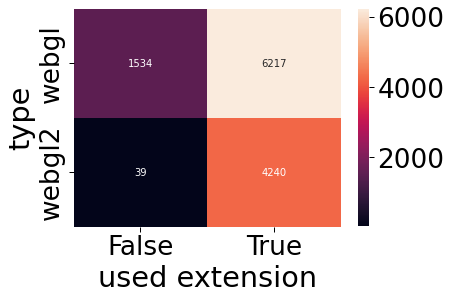

In [39]:
tmpa = tmp.copy()
tmpa['used extension'] = tmpa['extension_count'].apply(lambda x: x > 0)
sns.heatmap(tmpa.groupby(['type', 'used extension']).size().unstack(), annot=True, fmt='d')

In [40]:
df_ext = df_context_noraf[['frame.context.maghsk.extensions', 'frame.context.maghsk.createArguments.0', 'idx']].dropna()
df_ext = df_ext.rename(columns={'frame.context.maghsk.extensions': 'extensions', 'frame.context.maghsk.createArguments.0': 'type'})
df_ext['type'].replace({'experimental-webgl': 'webgl'}, inplace=True)
df_ext['extensions'] = df_ext['extensions'].apply(lambda x: list(set(x)))
df_ext

,extensions,type,idx
0,"[WEBGL_multisampled_render_to_texture, EXT_col...",webgl2,0
3,"[EXT_texture_filter_anisotropic, EXT_color_buf...",webgl2,2
4,"[EXT_texture_filter_anisotropic, EXT_color_buf...",webgl2,2
5,"[EXT_texture_filter_anisotropic, EXT_color_buf...",webgl2,2
6,"[EXT_texture_filter_anisotropic, EXT_color_buf...",webgl2,2
...,...,...,...
35471,"[EXT_texture_filter_anisotropic, OES_standard_...",webgl,29218
35473,"[MOZ_WEBGL_compressed_texture_pvrtc, MOZ_WEBGL...",webgl,29219
35477,"[OES_texture_half_float_linear, OES_standard_d...",webgl,29221
35479,[],webgl,29224


In [41]:
def concatenate_unique(lst):
    return sorted(set([item for sublist in lst for item in sublist]))

In [42]:
df_ext = pd.DataFrame(df_ext.groupby('idx')['extensions'].apply(concatenate_unique), columns=['extensions'])
df_ext

,extensions
idx,
0,"[EXT_color_buffer_float, EXT_color_buffer_half..."
2,"[EXT_color_buffer_float, EXT_texture_filter_an..."
11,"[EXT_shader_texture_lod, OES_standard_derivati..."
15,"[EXT_color_buffer_float, EXT_texture_filter_an..."
17,"[EXT_blend_minmax, EXT_color_buffer_float, EXT..."
...,...
29218,"[ANGLE_instanced_arrays, EXT_texture_filter_an..."
29219,"[MOZ_WEBGL_compressed_texture_astc, MOZ_WEBGL_..."
29221,"[ANGLE_instanced_arrays, OES_element_index_uin..."


In [43]:
(df_ext['extensions'].str.len() > 0).value_counts()

extensions
True     7944
False    1242
Name: count, dtype: int64

In [44]:
df_ext_e = df_ext.explode('extensions').dropna().reset_index(drop=False).rename(columns={'index': 'idx-context'})
df_ext_e['extensions'] = df_ext_e['extensions'].str.lower()
set(df_ext_e['extensions'].tolist())

{'angle_instanced_arrays',
 'ext_blend_minmax',
 'ext_color_buffer_float',
 'ext_color_buffer_float_linear',
 'ext_color_buffer_half_float',
 'ext_disjoint_timer_query',
 'ext_disjoint_timer_query_webgl2',
 'ext_draw_buffers',
 'ext_float_blend',
 'ext_frag_depth',
 'ext_multisampled_render_to_texture',
 'ext_shader_texture_lod',
 'ext_srgb',
 'ext_texture_compression_bptc',
 'ext_texture_compression_rgtc',
 'ext_texture_filter_anisotropic',
 'ext_texture_norm16',
 'gl_img_texture_compression_pvrtc',
 'gl_oes_standard_derivatives',
 'img_texture_compression_pvrtc',
 'khr_parallel_shader_compile',
 'moz_ext_texture_filter_anisotropic',
 'moz_oes_texture_half_float_linear',
 'moz_oes_vertex_array_object',
 'moz_webgl_compressed_texture_astc',
 'moz_webgl_compressed_texture_atc',
 'moz_webgl_compressed_texture_etc',
 'moz_webgl_compressed_texture_etc1',
 'moz_webgl_compressed_texture_pvrtc',
 'moz_webgl_depth_texture',
 'nvx_gpu_memory_info',
 'oculus_multiview',
 'oes_draw_buffers_indexe

In [45]:
unsupported_extension_keywords = [
    '_bptc',
    '_pvrtc',
    '_rgtc',
    '_s3tc',
    # 'debug_renderer',
    'disjoint_timer_query',
    'lose_context',
    'multiview',
    'provoking_vertex'
]
df_ext['unsupported'] = df_ext['extensions'].apply(lambda exts: any([kwd in ext for kwd in unsupported_extension_keywords for ext in exts]))

In [46]:
df_ext.index.nunique()

9186

In [47]:
df_ext[df_ext['unsupported'] == True].index.nunique()

1686

In [48]:
df_ext[df_ext['unsupported'] == True].index.nunique() / df_ext.index.nunique()

0.18354016982364468

In [49]:
df_ext[df_ext['unsupported'] == True]

,extensions,unsupported
idx,,
17,"[EXT_blend_minmax, EXT_color_buffer_float, EXT...",True
21,"[ANGLE_instanced_arrays, EXT_texture_filter_an...",True
37,"[ANGLE_instanced_arrays, EXT_blend_minmax, EXT...",True
39,"[ANGLE_instanced_arrays, EXT_blend_minmax, EXT...",True
68,"[EXT_texture_filter_anisotropic, OES_standard_...",True
...,...,...
29197,"[EXT_blend_minmax, EXT_color_buffer_float, EXT...",True
29208,"[ANGLE_instanced_arrays, OES_vertex_array_obje...",True
29216,"[EXT_texture_filter_anisotropic, WEBGL_debug_r...",True


In [50]:
df_ext['unsupported'].value_counts()

unsupported
False    7500
True     1686
Name: count, dtype: int64

In [51]:
df_ext_e

,idx,extensions
0,0,ext_color_buffer_float
1,0,ext_color_buffer_half_float
2,0,oes_texture_float_linear
3,0,webgl_multisampled_render_to_texture
4,2,ext_color_buffer_float
...,...,...
60586,29235,webgl_debug_shaders
60587,29235,webgl_depth_texture
60588,29235,webgl_draw_buffers
60589,29235,webgl_lose_context


In [52]:
for kwd in unsupported_extension_keywords:
    print(kwd, df_ext_e[df_ext_e.extensions.str.contains(kwd)].idx.nunique())

_bptc 463
_pvrtc 726
_rgtc 86
_s3tc 1429
disjoint_timer_query 620
lose_context 197
multiview 260
provoking_vertex 76


# RQ1: Context Attributes & Create Arguments

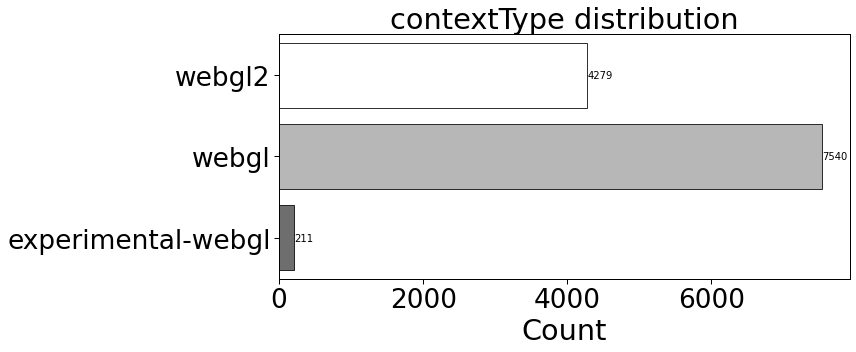

In [53]:
# df_context_noraf["frame.context.maghsk.createArguments.0"].value_counts()
fig, axes = plt.subplots(figsize=(12, 5))
sns.countplot(y="frame.context.maghsk.createArguments.0", data=df_context_noraf, ax=axes, edgecolor='black')
axes.set_xlabel('Count')
axes.set_ylabel('')
axes.set_title('contextType distribution')
for rect in axes.patches:
    axes.annotate(f'{rect.get_width():.0f}', (rect.get_width(), rect.get_y()+rect.get_height()/2), ha='left', va='center')
plt.tight_layout()
plt.savefig('fig/results_raf_contextType.pdf', bbox_inches='tight')

In [54]:
df_context_noraf.groupby('idx')["frame.context.maghsk.createArguments.0"].unique().explode().value_counts()

frame.context.maghsk.createArguments.0
webgl                 5810
webgl2                3341
experimental-webgl     172
Name: count, dtype: int64

In [55]:
df_context_noraf.columns.tolist()

['idx-frame',
 'idx',
 'category',
 'label_ERROR',
 'label_usecase',
 'label_interactions',
 'label_comments',
 'url',
 'date',
 'netIdleTimeout',
 'manual_interaction',
 'manual_interaction_failed',
 'raf_path',
 'url_essential',
 'frame.url',
 'frame.title',
 'frame.date',
 'frame.when',
 'frame.counter.frames',
 'frame.counter.contextsNum',
 'frame.counter.usedWebGL',
 'frame.counter.usedOffScreenCanvas',
 'frame.context.canvasSize',
 'frame.context.canvasHidden',
 'frame.context.canvasContained',
 'frame.context.maghsk.exception',
 'frame.context.maghsk.createTime',
 'frame.context.maghsk.createArguments.0',
 'frame.context.maghsk.createArguments.1.alpha',
 'frame.context.maghsk.createArguments.1.depth',
 'frame.context.maghsk.createArguments.1.stencil',
 'frame.context.maghsk.createArguments.1.antialias',
 'frame.context.maghsk.createArguments.1.premultipliedAlpha',
 'frame.context.maghsk.createArguments.1.preserveDrawingBuffer',
 'frame.context.maghsk.createArguments.1.powerPrefe

In [56]:
df_context_noraf[df_context_noraf['frame.context.maghsk.createArguments.1.anialias'].notnull()]

,idx-frame,idx,category,label_ERROR,label_usecase,label_interactions,label_comments,url,date,netIdleTimeout,...,frame.context.maghsk.counter.textureTypes.DataView,frame.context.maghsk.counter.textureTypes.Vector2,frame.context.maghsk.createArguments.1.referrer,frame.context.maghsk.createArguments.1.useWebgl2,frame.context.maghsk.createArguments.1.dpi,frame.context.maghsk.createArguments.1.clearColor,frame.context.maghsk.counter.funcCount.getAttachedShaders,frame.context.maghsk.createArguments.1.adaptToDeviceRatio,frame.context.maghsk.createArguments.1.dnt,data source


In [57]:
df_context_noraf[df_context_noraf['frame.context.maghsk.createArguments.1.failIfMajorPerformanceCaviet'].notnull()]

,idx-frame,idx,category,label_ERROR,label_usecase,label_interactions,label_comments,url,date,netIdleTimeout,...,frame.context.maghsk.counter.textureTypes.DataView,frame.context.maghsk.counter.textureTypes.Vector2,frame.context.maghsk.createArguments.1.referrer,frame.context.maghsk.createArguments.1.useWebgl2,frame.context.maghsk.createArguments.1.dpi,frame.context.maghsk.createArguments.1.clearColor,frame.context.maghsk.counter.funcCount.getAttachedShaders,frame.context.maghsk.createArguments.1.adaptToDeviceRatio,frame.context.maghsk.createArguments.1.dnt,data source
1902,6117,1945,[awwwards],0,1,0,,http://steveroach.eugjlee.com/home,1.686226e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Crawling/Galleries]


In [58]:
df_context_noraf['frame.context.maghsk.createArguments.1.powerPreference'].fillna('not set').value_counts()

frame.context.maghsk.createArguments.1.powerPreference
not set             6416
default             3504
high-performance    2074
low-power             36
Name: count, dtype: int64

In [59]:
df_context_noraf[df_context_noraf['frame.context.maghsk.createArguments.1.powerPreference']=='low-power']

,idx-frame,idx,category,label_ERROR,label_usecase,label_interactions,label_comments,url,date,netIdleTimeout,...,frame.context.maghsk.counter.textureTypes.DataView,frame.context.maghsk.counter.textureTypes.Vector2,frame.context.maghsk.createArguments.1.referrer,frame.context.maghsk.createArguments.1.useWebgl2,frame.context.maghsk.createArguments.1.dpi,frame.context.maghsk.createArguments.1.clearColor,frame.context.maghsk.counter.funcCount.getAttachedShaders,frame.context.maghsk.createArguments.1.adaptToDeviceRatio,frame.context.maghsk.createArguments.1.dnt,data source
1010,3545,1083,[awwwards],0,1,0,,http://juicebrothers.at,1.686222e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Crawling/Galleries]
1902,6117,1945,[awwwards],0,1,0,,http://steveroach.eugjlee.com/home,1.686226e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Crawling/Galleries]
3768,12928,4107,[awwwards],0,1,0,,https://0x.se/,1.686234e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Crawling/Galleries]
3769,12928,4107,[awwwards],0,1,0,,https://0x.se/,1.686234e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Crawling/Galleries]
4917,17116,4982,[bq],0,1,0,,https://apiida.com/,1.686239e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[HTTP Archive]
6762,23157,6611,[bq],0,1,1,,https://chatchatgame.netlify.app/,1.686245e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[HTTP Archive]
12407,39107,10316,[awwwards],0,1,0,scroll,https://hytek.co.jp/,1.686261e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Crawling/Galleries]
17964,56151,14138,[awwwards],0,1,0,,https://peaceprizelaureates.nobelpeacecenter.o...,1.686278e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Crawling/Galleries]
18976,58570,14841,"[awwwards, cssdesign]",0,1,0,,https://quoitworks.com/,1.686278e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Crawling/Galleries, Crawling/Galleries]"
18977,58570,14841,"[awwwards, cssdesign]",0,1,0,,https://quoitworks.com/,1.686278e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Crawling/Galleries, Crawling/Galleries]"


In [60]:
create_arguments_columns_list = [
    "frame.context.maghsk.createArguments.0",
    'frame.context.maghsk.createArguments.1.alpha',
    'frame.context.maghsk.createArguments.1.antialias',
    'frame.context.maghsk.createArguments.1.depth',
    'frame.context.maghsk.createArguments.1.desynchronized',
    'frame.context.maghsk.createArguments.1.failIfMajorPerformanceCaveat',
    'frame.context.maghsk.createArguments.1.powerPreference',
    'frame.context.maghsk.createArguments.1.premultipliedAlpha',
    'frame.context.maghsk.createArguments.1.preserveDrawingBuffer',
    'frame.context.maghsk.createArguments.1.stencil',
    'frame.context.maghsk.createArguments.1.xrCompatible', ]
tmp = df_context_noraf[create_arguments_columns_list].fillna('not set').rename(columns={
    "frame.context.maghsk.createArguments.0": 'type',
    'frame.context.maghsk.createArguments.1.alpha': 'alpha',
    'frame.context.maghsk.createArguments.1.antialias': 'antialias',
    'frame.context.maghsk.createArguments.1.depth': 'depth',
    'frame.context.maghsk.createArguments.1.desynchronized': 'desynchronized',
    'frame.context.maghsk.createArguments.1.failIfMajorPerformanceCaveat': 'failIfMajorPerformanceCaveat',
    'frame.context.maghsk.createArguments.1.powerPreference': 'powerPreference',
    'frame.context.maghsk.createArguments.1.premultipliedAlpha': 'premultipliedAlpha',
    'frame.context.maghsk.createArguments.1.preserveDrawingBuffer': 'preserveDrawingBuffer',
    'frame.context.maghsk.createArguments.1.stencil': 'stencil',
    'frame.context.maghsk.createArguments.1.xrCompatible': 'xrCompatible',
})
tmp.type.replace({
    'webgl': 'webgl1',
    'experimental-webgl': 'webgl1',
}, inplace=True)

In [61]:
tmp.groupby('type').value_counts()

type    alpha    antialias  depth    desynchronized  failIfMajorPerformanceCaveat  powerPreference   premultipliedAlpha  preserveDrawingBuffer  stencil  xrCompatible
webgl1  not set  not set    not set  not set         not set                       not set           not set             not set                not set  not set         859
        False    False      True     not set         not set                       not set           True                False                  True     not set         658
                 not set    True     not set         not set                       high-performance  not set             not set                True     not set         643
        True     False      True     not set         not set                       not set           not set             not set                True     not set         498
        False    True       True     not set         not set                       not set           True                False                

In [62]:
res = []
for t in ['webgl1', 'webgl2']:
    tmpa = tmp[tmp.type == t].drop(columns='type')
    results = [tmpa[col].value_counts(normalize=True) for col in tmpa.columns]
    results = pd.concat(results, axis=1)
    results.columns = tmpa.columns
    results.drop(['8', '', 8], inplace=True, errors='ignore')
    res.append(results)

In [63]:
total_context = len(tmp)
total_context

12030

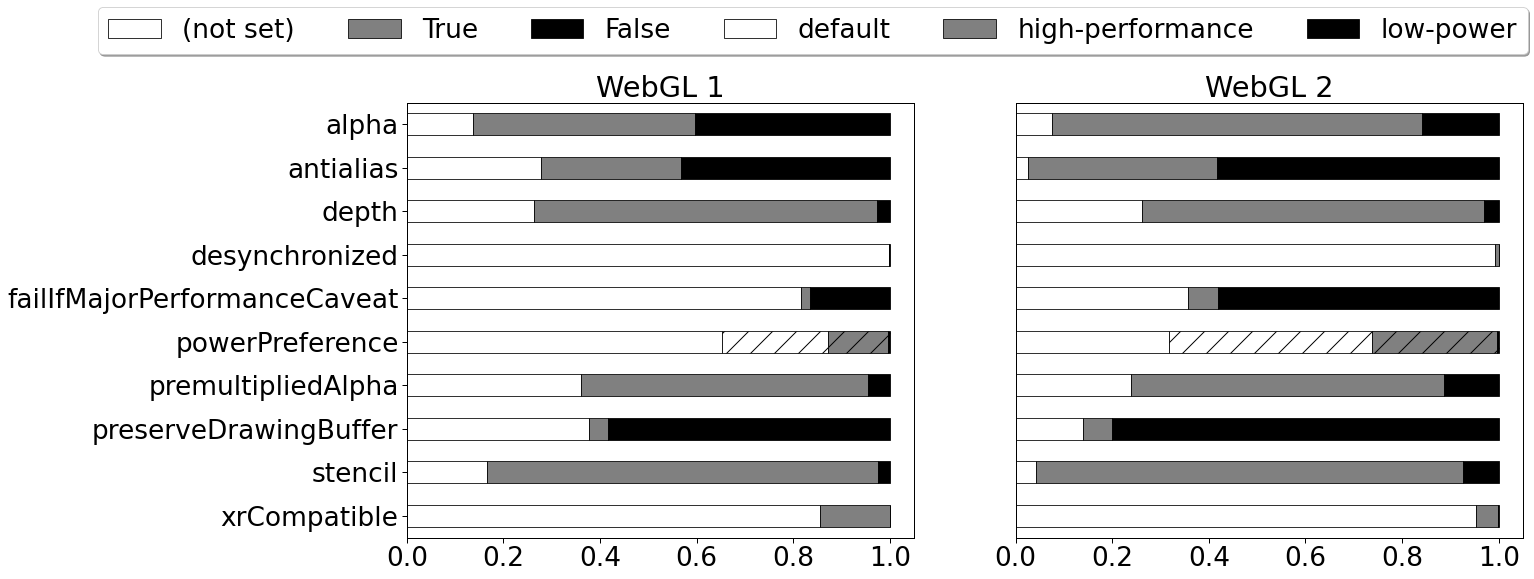

In [64]:
palette = ['white', 'grey', 'black']

fig, ax = plt.subplots(1, 2, figsize=(20,8))
# plot a stacked bar chart
for i, gl_type in enumerate(['WebGL 1', 'WebGL 2']):
    # res[i].T[['not set', True, False, 'default', 'high-performance', 'low-power']].sort_values(['not set'], ascending=False).plot(kind='barh', stacked=True, ax=ax[i], legend=False)
    res[i].T[['not set', True, False, 'default', 'high-performance', 'low-power']].sort_index(ascending=False).plot(kind='barh', stacked=True, ax=ax[i], legend=False, edgecolor='black', color=palette)#, hatch=hatch_patterns)
    ax[i].set_title(gl_type)
ax[0].patches[34].set_hatch('/')
ax[1].patches[34].set_hatch('/')
ax[0].patches[44].set_hatch('/')
ax[1].patches[44].set_hatch('/')
ax[0].patches[54].set_hatch('/')
ax[1].patches[54].set_hatch('/')
# ax[0].patches[44].set_edgecolor('white')
# ax[1].patches[44].set_edgecolor('white')
# ax[0].patches[54].set_edgecolor('white')
# ax[1].patches[54].set_edgecolor('white')

ax[1].yaxis.set_visible(False)
# results.T.plot(kind='barh', stacked=True, figsize=(10, 8))
plt.legend(['(not set)', True, False, 'default', 'high-performance', 'low-power'], loc='upper center', bbox_to_anchor=(-0.4, 1.25), ncol=6, fancybox=True, shadow=True)
# plt.yticks([0, 25, 50, 75, 100], ['0%', '25%', '50%', '75%', '100%'])
plt.savefig('fig/results_context_options.pdf', bbox_inches='tight')

In [98]:
# results[['powerPreference']].dropna().plot(kind='pie', subplots=True, legend=False)

In [66]:
# # plot a stacked bar chart
# results.drop(columns=['powerPreference', 'type']).T[['not set', True, False]].sort_values(['not set', True], ascending=False).plot(kind='barh', stacked=True, figsize=(12, 8))
# # results.T.plot(kind='barh', stacked=True, figsize=(10, 8))
# plt.legend(['not set', True, False], loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=3)
# # plt.yticks([0, 25, 50, 75, 100], ['0%', '25%', '50%', '75%', '100%'])
# plt.savefig('fig/results_context_options.pdf', bbox_inches='tight')

# RQ2: Resources

In [67]:
resource_columns = df_context_noraf.columns[df_context_noraf.columns.str.startswith('frame.context.maghsk.counter.resources')].tolist()

In [68]:
picked_columns = ['idx', *resource_columns]

In [69]:
df_res = df_context_noraf[picked_columns].fillna(0).groupby('idx').sum().astype(int)
df_res.rename(columns={x: x.split('.')[-1] for x in resource_columns}, inplace=True)

In [70]:
df_res

,Texture,Buffer,Program,Shader,VertexArray,Framebuffer,Renderbuffer,Query,Sampler,TransformFeedback
idx,,,,,,,,,,
0,4,3,1,2,1,0,0,0,0,0
2,45,20,8,20,8,4,0,0,0,0
11,4,24,6,12,0,0,0,0,0,0
15,20,7,3,7,3,14,0,0,0,0
17,841,1849,27,54,0,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
29218,17,32,12,24,0,1,1,0,0,0
29219,15,7,8,17,0,4,0,0,0,0
29221,32,19,3,6,0,0,0,0,0,0


In [106]:
cols = ['Texture',
 'Buffer',
 'Program',
 'Shader',
 'VertexArray',
 'Framebuffer',
#  'Renderbuffer',
#  'Query',
#  'Sampler',
#  'TransformFeedback'
 ]

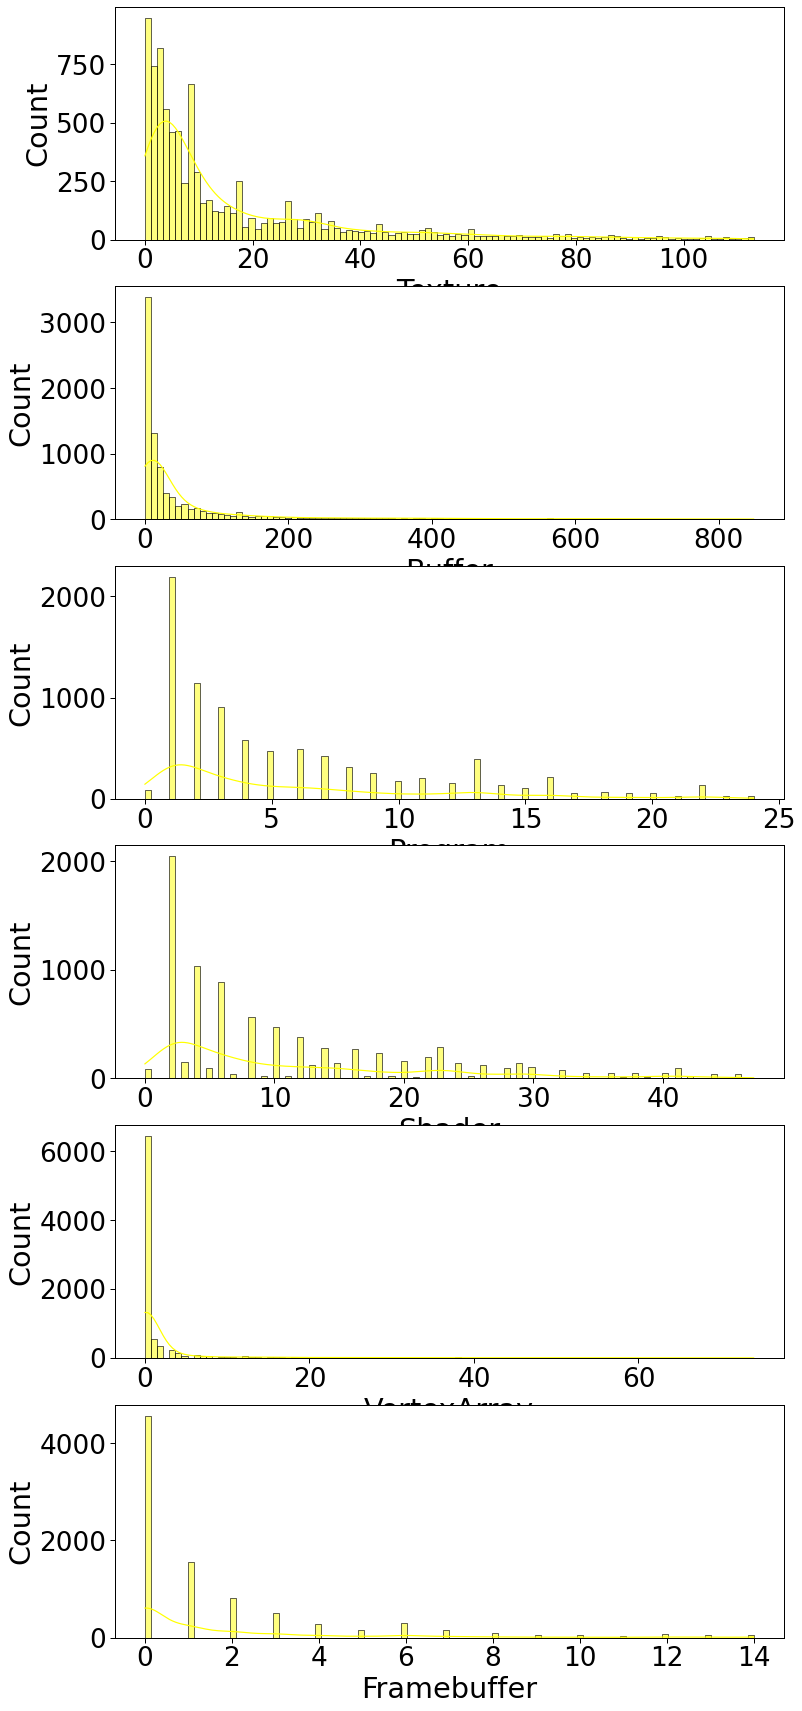

In [128]:
total = len(cols)
ax, fig = plt.subplots(total, 1, figsize=(12, 30))
for col in cols:
    tmp = df_res[col]
    tmp = tmp[tmp < tmp.quantile(0.95)]
    sns.histplot(tmp, bins=100, kde=True, ax=fig[cols.index(col)], color='yellow', line_kws={'color': 'red'})

In [71]:
df_res.describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

,Texture,Buffer,Program,Shader,VertexArray,Framebuffer,Renderbuffer,Query,Sampler,TransformFeedback
count,9186.000000,9186.000000,9186.000000,9186.000000,9186.000000,9186.000000,9186.000000,9186.000000,9186.000000,9186.000000
mean,38.336273,267.165796,8.151753,16.083388,24.529828,5.050185,2.006967,1.500653,0.055193,0.000109
std,282.842156,1803.065731,25.915256,51.611627,232.467732,52.057828,29.703572,103.277219,5.258614,0.010434
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,5.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000,16.000000,4.000000,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,27.000000,71.000000,10.000000,20.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000
90%,64.000000,355.000000,17.000000,33.000000,18.000000,7.000000,3.000000,0.000000,0.000000,0.000000
95%,114.000000,854.250000,25.000000,48.000000,74.750000,15.000000,6.000000,0.000000,0.000000,0.000000
99%,486.000000,4235.150000,59.000000,115.150000,457.900000,56.000000,20.000000,0.000000,0.000000,0.000000


<Axes: xlabel='Texture', ylabel='Count'>

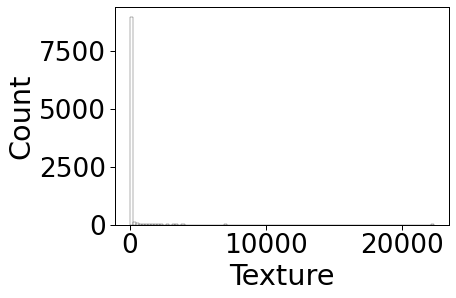

In [72]:
sns.histplot(df_res, x='Texture', bins=100)

In [73]:
df_context_noraf

,idx-frame,idx,category,label_ERROR,label_usecase,label_interactions,label_comments,url,date,netIdleTimeout,...,frame.context.maghsk.counter.textureTypes.DataView,frame.context.maghsk.counter.textureTypes.Vector2,frame.context.maghsk.createArguments.1.referrer,frame.context.maghsk.createArguments.1.useWebgl2,frame.context.maghsk.createArguments.1.dpi,frame.context.maghsk.createArguments.1.clearColor,frame.context.maghsk.counter.funcCount.getAttachedShaders,frame.context.maghsk.createArguments.1.adaptToDeviceRatio,frame.context.maghsk.createArguments.1.dnt,data source
0,0,0,[bq],0,1,0,,http://0ldsk00l.ca/,1.686218e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[HTTP Archive]
3,2,2,[bq],0,3,0,,http://1000000-lives.com/,1.686218e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[HTTP Archive]
4,2,2,[bq],0,3,0,,http://1000000-lives.com/,1.686218e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[HTTP Archive]
5,2,2,[bq],0,3,0,,http://1000000-lives.com/,1.686218e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[HTTP Archive]
6,2,2,[bq],0,3,0,,http://1000000-lives.com/,1.686218e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[HTTP Archive]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35471,116504,29218,[bq],0,1,0,,https://zum-nussbaum-frankfurt.de/,1.686340e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[HTTP Archive]
35473,116507,29219,"[awwwards, cssdesign]",0,1,1,TODO,https://zumi.gucci.com/,1.686334e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Crawling/Galleries, Crawling/Galleries]"
35477,116537,29221,[bq],0,1,0,,https://zungsung.en.taiwantrade.com/,1.686335e+12,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[HTTP Archive]
35479,116544,29224,[bq],0,1,0,,https://zurstrass.com/,1.686386e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[HTTP Archive]


In [74]:
print(df_context_noraf.columns.tolist())

['idx-frame', 'idx', 'category', 'label_ERROR', 'label_usecase', 'label_interactions', 'label_comments', 'url', 'date', 'netIdleTimeout', 'manual_interaction', 'manual_interaction_failed', 'raf_path', 'url_essential', 'frame.url', 'frame.title', 'frame.date', 'frame.when', 'frame.counter.frames', 'frame.counter.contextsNum', 'frame.counter.usedWebGL', 'frame.counter.usedOffScreenCanvas', 'frame.context.canvasSize', 'frame.context.canvasHidden', 'frame.context.canvasContained', 'frame.context.maghsk.exception', 'frame.context.maghsk.createTime', 'frame.context.maghsk.createArguments.0', 'frame.context.maghsk.createArguments.1.alpha', 'frame.context.maghsk.createArguments.1.depth', 'frame.context.maghsk.createArguments.1.stencil', 'frame.context.maghsk.createArguments.1.antialias', 'frame.context.maghsk.createArguments.1.premultipliedAlpha', 'frame.context.maghsk.createArguments.1.preserveDrawingBuffer', 'frame.context.maghsk.createArguments.1.powerPreference', 'frame.context.maghsk.crea

In [75]:
df_shader = df_context_noraf[['idx', 'frame.context.maghsk.shaders']].rename(columns={'frame.context.maghsk.shaders': 'shaders'}).reset_index(drop=False).rename(columns={'index': 'idx-context'}).explode('shaders').dropna().reset_index(drop=True)
df_shader = df_shader.join(pd.DataFrame(df_shader['shaders'].to_list(), index=df_shader.index).add_prefix('shader.'))
df_shader = df_shader[df_shader['shader.source'].map(lambda x: type(x)) == str]
df_shader = df_shader[df_shader['shader.translatedSource'].str.len() > 0]

In [76]:
print(df_shader.loc[1,'shader.translatedSource'])

// FRAGMENT SHADER BEGIN

// GLSL BEGIN

#version 300 es
#define varying in
layout(location = 0) out highp vec4 pc_fragColor;
#define gl_FragColor pc_fragColor
#define gl_FragDepthEXT gl_FragDepth
#define texture2D texture
#define textureCube texture
#define texture2DProj textureProj
#define texture2DLodEXT textureLod
#define texture2DProjLodEXT textureProjLod
#define textureCubeLodEXT textureLod
#define texture2DGradEXT textureGrad
#define texture2DProjGradEXT textureProjGrad
#define textureCubeGradEXT textureGrad
precision highp float;
precision highp int;
#define HIGH_PRECISION
#define SHADER_TYPE MeshStandardMaterial
#define SHADER_NAME 
#define STANDARD 
#define USE_FOG
#define FLAT_SHADED
#define LEGACY_LIGHTS
uniform mat4 viewMatrix;
uniform vec3 cameraPosition;
uniform bool isOrthographic;
#define OPAQUE
vec4 LinearToLinear( in vec4 value ) {
	return value;
}
vec4 LinearTosRGB( in vec4 value ) {
	return vec4( mix( pow( value.rgb, vec3( 0.41666 ) ) * 1.055 - vec3( 0.055 ), value

In [77]:
pattern = r"// INITIAL HLSL BEGIN\n*(.*?)\n*// INITIAL HLSL END"
def translated_source_to_hlsl(s: str):
    result = re.search(pattern, s, re.DOTALL)
    if result:
        return result.group(1)
    print(f'"{s}"')
    raise ValueError('No match found')

In [78]:
df_shader['shader.source'].map(lambda x: type(x)).value_counts()

shader.source
<class 'str'>    147470
Name: count, dtype: int64

In [79]:
df_shader['shader.translatedSource'] = df_shader['shader.translatedSource'].map(translated_source_to_hlsl)

In [80]:
print(df_shader['shader.translatedSource'][1])

#pragma warning( disable: 3556 3571 )
struct _IncidentLight
{
    float3 _color;
    float3 _direction;
    bool _visible;
};
#pragma pack_matrix(row_major)
struct rm__IncidentLight
{
    float3 _color;
    float3 _direction;
    bool _visible;
};
#pragma pack_matrix(column_major)
struct std__IncidentLight
{
    float3 _color;
    float3 _direction;
    bool _visible;
};
#pragma pack_matrix(row_major)
struct std_rm__IncidentLight
{
    float3 _color;
    float3 _direction;
    bool _visible;
};
#pragma pack_matrix(column_major)
struct std_fp__IncidentLight
{
    float3 _color;
    float pad_0;
    float3 _direction;
    bool _visible;
};
#pragma pack_matrix(row_major)
struct std_rm_fp__IncidentLight
{
    float3 _color;
    float pad_1;
    float3 _direction;
    bool _visible;
};
#pragma pack_matrix(column_major)
struct _ReflectedLight
{
    float3 _directDiffuse;
    float3 _directSpecular;
    float3 _indirectDiffuse;
    float3 _indirectSpecular;
};
#pragma pack_matrix(row_major)
s

In [81]:
import json

a = [['%05d' % idx, url] for _, (idx, url) in df_context_noraf[['idx', 'url']].iterrows()]
with open('output/0611-all_essential.json', 'w') as fp:
    json.dump(a, fp)
print(len(a))

12030


# RQ3: 有几个shader用了for循环呀？

In [82]:
def has_keyword(keyword:str):
    def wrapper(s: str):
        matches = re.findall(r'\b' + keyword + r'\b', s)
        return len(matches) > 0
    return wrapper

In [83]:
has_keyword('for')(";\nfor()")

True

In [84]:
df_shader_used_for = df_shader['shader.translatedSource'].map(has_keyword('for'))
df_shader_used_do = df_shader['shader.translatedSource'].map(has_keyword('do'))
df_shader_used_while = df_shader['shader.translatedSource'].map(has_keyword('while'))
df_shader_used = df_shader_used_for | df_shader_used_do | df_shader_used_while
print(df_shader_used_for.value_counts(), end='\n\n')
print(df_shader_used_do.value_counts(), end='\n\n')
print(df_shader_used_while.value_counts(), end='\n\n')
print(df_shader_used.value_counts(), end='\n\n')

shader.translatedSource
False    142143
True       5327
Name: count, dtype: int64

shader.translatedSource
False    147470
Name: count, dtype: int64

shader.translatedSource
False    147470
Name: count, dtype: int64

shader.translatedSource
False    142143
True       5327
Name: count, dtype: int64



In [85]:
# 提取多行字符串s中所有包含关键字for的行
def extract_keyword_lines(s: str, keyword: str):
    lines = s.split('\n')
    pattern = r'\b' + keyword + r'\b'
    return [line for line in lines if re.search(pattern, line)]

In [87]:
l = df_shader[df_shader_used_for]['shader.translatedSource'].map(lambda x: extract_keyword_lines(x, 'for')).explode().to_list()

In [88]:
if re.search(r'[\<\>]=? -?[^0-9]', 'i < _i', re.DOTALL):
    print(True)

True


In [89]:
[x for x in l if re.search(r'[\<\>]=? [^0-9]', x, re.DOTALL)]

['{ for(uint _u_xlatu_loop_15683 = {0}; (_u_xlatu_loop_15683 < _u_xlatu23); (_u_xlatu_loop_15683++))',
 '{ for(uint _u_xlatu_loop_15716 = {0}; (_u_xlatu_loop_15716 < _u_xlatu45); (_u_xlatu_loop_15716++))',
 '{ for(uint _u_xlatu_loop_15696 = {0}; (_u_xlatu_loop_15696 < uint_ctor_int(_u_xlati27)); (_u_xlatu_loop_15696++))',
 '{ for(uint _u_xlatu_loop_15706 = {0}; (_u_xlatu_loop_15706 < _u_xlatu38); (_u_xlatu_loop_15706++))',
 '{ for(uint _u_xlatu_loop_15721 = {0}; (_u_xlatu_loop_15721 < _u_xlatu39); (_u_xlatu_loop_15721++))',
 '{ for(uint _u_xlatu_loop_15712 = {0}; (_u_xlatu_loop_15712 < _u_xlatu0); (_u_xlatu_loop_15712++))',
 '{ for(uint _u_xlatu_loop_15721 = {0}; (_u_xlatu_loop_15721 < _u_xlatu39); (_u_xlatu_loop_15721++))',
 '{ for(uint _u_xlatu_loop_15706 = {0}; (_u_xlatu_loop_15706 < _u_xlatu38); (_u_xlatu_loop_15706++))',
 '{ for(uint _u_xlatu_loop_15712 = {0}; (_u_xlatu_loop_15712 < _u_xlatu31); (_u_xlatu_loop_15712++))',
 '{ for(uint _u_xlatu_loop_15723 = {0}; (_u_xlatu_loop_1572

In [90]:
df_shader_used.value_counts()

shader.translatedSource
False    142143
True       5327
Name: count, dtype: int64

# RQ1: Offscreen Canvas

In [92]:
df_context_noraf.columns.to_list()

['idx-frame',
 'idx',
 'category',
 'label_ERROR',
 'label_usecase',
 'label_interactions',
 'label_comments',
 'url',
 'date',
 'netIdleTimeout',
 'manual_interaction',
 'manual_interaction_failed',
 'raf_path',
 'url_essential',
 'frame.url',
 'frame.title',
 'frame.date',
 'frame.when',
 'frame.counter.frames',
 'frame.counter.contextsNum',
 'frame.counter.usedWebGL',
 'frame.counter.usedOffScreenCanvas',
 'frame.context.canvasSize',
 'frame.context.canvasHidden',
 'frame.context.canvasContained',
 'frame.context.maghsk.exception',
 'frame.context.maghsk.createTime',
 'frame.context.maghsk.createArguments.0',
 'frame.context.maghsk.createArguments.1.alpha',
 'frame.context.maghsk.createArguments.1.depth',
 'frame.context.maghsk.createArguments.1.stencil',
 'frame.context.maghsk.createArguments.1.antialias',
 'frame.context.maghsk.createArguments.1.premultipliedAlpha',
 'frame.context.maghsk.createArguments.1.preserveDrawingBuffer',
 'frame.context.maghsk.createArguments.1.powerPrefe

In [93]:
tmp = df_context_noraf.drop_duplicates(subset=['idx'])
cat = tmp['frame.counter.usedOffScreenCanvas'].str.join(',')
cat.value_counts()

frame.counter.usedOffScreenCanvas
                   5662
2d                 3515
webgl2                6
webgl,webgl2          1
webgl                 1
2d,webgl,webgl2       1
Name: count, dtype: int64

In [94]:
tmp[cat=='2d']

,idx-frame,idx,category,label_ERROR,label_usecase,label_interactions,label_comments,url,date,netIdleTimeout,...,frame.context.maghsk.counter.textureTypes.DataView,frame.context.maghsk.counter.textureTypes.Vector2,frame.context.maghsk.createArguments.1.referrer,frame.context.maghsk.createArguments.1.useWebgl2,frame.context.maghsk.createArguments.1.dpi,frame.context.maghsk.createArguments.1.clearColor,frame.context.maghsk.counter.funcCount.getAttachedShaders,frame.context.maghsk.createArguments.1.adaptToDeviceRatio,frame.context.maghsk.createArguments.1.dnt,data source
0,0,0,[bq],0,1,0,,http://0ldsk00l.ca/,1.686218e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[HTTP Archive]
3,2,2,[bq],0,3,0,,http://1000000-lives.com/,1.686218e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[HTTP Archive]
12,20,15,[awwwards],0,1,0,,http://1j1d.art,1.686218e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Crawling/Galleries]
35,79,33,[bq],<NA>,<NA>,<NA>,TODO,http://360.gemskyworld.vn/,1.686218e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[HTTP Archive]
37,80,34,[bq],0,1,1,,http://360.jomsborg-vineta.com/,1.686218e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[HTTP Archive]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35430,116464,29202,[bq],0,1,0,,https://zoskinportal.jp/,1.686340e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[HTTP Archive]
35435,116465,29203,[bq],0,1,0,,https://zoskinportal.jp/faq/,1.686334e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[HTTP Archive]
35439,116466,29204,[bq],0,1,0,,https://zoskinportal.jp/trouble/,1.686337e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[HTTP Archive]
35444,116482,29208,[bq],0,1,0,,https://zsjesenik.cz/,1.686386e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[HTTP Archive]


In [95]:
tmp['frame.counter.usedOffScreenCanvas'].explode().value_counts()

frame.counter.usedOffScreenCanvas
2d        3516
webgl2       8
webgl        3
Name: count, dtype: int64

In [96]:
tmp[cat=='webgl2']

,idx-frame,idx,category,label_ERROR,label_usecase,label_interactions,label_comments,url,date,netIdleTimeout,...,frame.context.maghsk.counter.textureTypes.DataView,frame.context.maghsk.counter.textureTypes.Vector2,frame.context.maghsk.createArguments.1.referrer,frame.context.maghsk.createArguments.1.useWebgl2,frame.context.maghsk.createArguments.1.dpi,frame.context.maghsk.createArguments.1.clearColor,frame.context.maghsk.counter.funcCount.getAttachedShaders,frame.context.maghsk.createArguments.1.adaptToDeviceRatio,frame.context.maghsk.createArguments.1.dnt,data source
11729,37304,9907,[awwwards],0,1,1,File not found,https://headbanger.ai/,1.686259e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Crawling/Galleries]
19101,58833,14918,[bq],0,1,1,,https://raviandemma.sbs.com.au/,1.686282e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[HTTP Archive]
20150,62360,15725,[tfjs_gallery],0,1,0,,https://shaderbooth.com/?85daa,1.686283e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Crawling/Galleries]
21086,64906,16385,[awwwards],0,1,1,File not found,https://steerthedeer.com,1.686285e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Crawling/Galleries]
21915,67394,17001,"[awwwards, bq, cssdesign]",0,1,0,,https://theremin.app,1.686287e+12,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Crawling/Galleries, HTTP Archive, Crawling/Ga..."
34916,115699,28960,[tfjs_gallery],0,1,0,,https://yiwenl.github.io/Sketches/exps/66/,1.686385e+12,0.0,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,[Crawling/Galleries]


In [97]:
df_context_noraf[df_context_noraf['frame.context.maghsk.counter.resources.Texture'] > 0]['frame.counter.usedOffScreenCanvas'].value_counts()

frame.counter.usedOffScreenCanvas
[]                     6469
[2d]                   4515
[webgl2]                  6
[webgl, webgl2]           1
[webgl]                   1
[2d, webgl, webgl2]       1
Name: count, dtype: int64

In [137]:
a = df_context_noraf.iloc[0]

In [138]:
a

idx-frame                                                                 0
idx                                                                       0
category                                                               [bq]
label_ERROR                                                               0
label_usecase                                                             1
                                                                  ...      
frame.context.maghsk.createArguments.1.clearColor                       NaN
frame.context.maghsk.counter.funcCount.getAttachedShaders               NaN
frame.context.maghsk.createArguments.1.adaptToDeviceRatio               NaN
frame.context.maghsk.createArguments.1.dnt                              NaN
data source                                                  [HTTP Archive]
Name: 0, Length: 375, dtype: object

In [147]:
l = sorted([(x, int(y)) for x, y in a.items() if x.startswith('frame.context.maghsk.counter.funcCount') and y > 0])
with open('tmp-function_list.txt', 'w') as fp:
    for x, y in l:
        fp.write(f'{x}: {y}\n')

In [151]:
l = [(x, y) for x, y in a.items() if 'extension' in x]


In [152]:
l

[('frame.context.maghsk.extensions',
  ['EXT_color_buffer_float',
   'OES_texture_float_linear',
   'EXT_color_buffer_half_float',
   'WEBGL_multisampled_render_to_texture']),
 ('frame.context.maghsk.createArguments.1.extensions', nan)]